## 12 The Central Limit Theorem

### .

### Overview
<span>
    <table>
        <tr><td>The Dataset<td><tr>
        <tr><td>Illustration of the Central Limit Theorem<td><tr>
        <tr><td>The Standard Error<td><tr>
        <tr><td>Increasing the sample size<td><tr>
    <table>
<span>

### Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.21.5'

## Data
We take as our population a tetrahedral (four sided) die.

In [2]:
# One throw leads to one of four outcomes
data = np.array([1.0, 2.0, 3.0, 4.0])
data

array([1., 2., 3., 4.])

D:\1\a3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


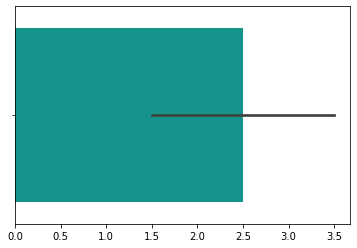

In [3]:
# Our data has a perfect uniform distribution
p=sns.barplot(data)

In [4]:
# Calculate the population mean
population_mu = data.mean()
population_mu

2.5

In [5]:
# Calculate the standard deviation of the population
population_sigma = data.std(ddof=0)
population_sigma

1.118033988749895

## Illustration of the Central Limit Theorem
The Central Limit Theorem (CLT) states, if we take the mean of a large number of independent samples, the sampling distribution will aproximate a normal distribution, regardless of the shape of the underlying distribution. Let's illustrate this by sampling the mean of two throws ($n=2$) with the tetrahedral die.

In [6]:
# Let's find out the number of possible outcomes with a sample size 2
possible_outcomes = 4**2
possible_outcomes

16

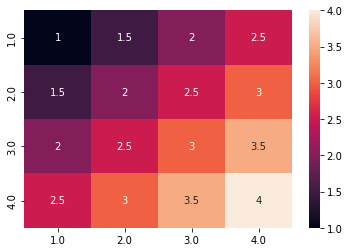

In [7]:
# Create a dataframe with the mean of all possible outcomes
mean_outcome_matrix = pd.DataFrame(index=data, dtype='float64', columns=data )

for x in data:
    for y in data:
        mean_outcome_matrix[x][y] = np.mean([x,y])

# Below you see a heatmap of the mean of all possible outcomes
p=sns.heatmap(mean_outcome_matrix, annot=True)

In [8]:
# Now get the mean of all possible mean outcomes
sample_mean = mean_outcome_matrix.mean().mean()
sample_mean

2.5

In [9]:
# Note the mean of all possible mean outcomes 
# is exactly the same as the population mean!
population_mu == sample_mean

True

D:\1\a3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


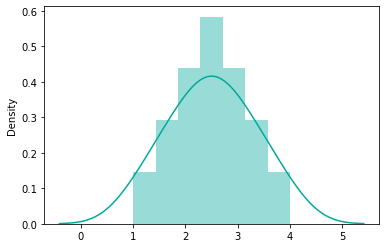

In [10]:
# Below a plot the sampling distribution of all possible mean outcomes
# Note that it's perfectly normal
diff_val_count = mean_outcome_matrix.stack().value_counts().count()
p=sns.distplot(mean_outcome_matrix.stack(), bins=diff_val_count)

## The Standard Error
The standard deviation of the sampling distribution is called the standard Error (SE).

In [11]:
# Calculate the standard error (SE) of all possible mean outcomes
mean_outcomes_SE = mean_outcome_matrix.stack().std(ddof=0)
mean_outcomes_SE

0.7905694150420949

In [12]:
# If we now calculate the ratio of sigma to SE
# we see it is the square root of 2
ratio_sigma_SE = population_sigma / mean_outcomes_SE
ratio_sigma_SE

1.414213562373095

In [13]:
# So if we square this ratio we get... our sample size (approximately)
ratio_sigma_SE ** 2

1.9999999999999996

This means that sigma $\sigma$ divided by the standard error $SE$ is the square root of our sample size $n$:

$$\frac{\sigma}{SE}= \sqrt{n}$$

Also means we can calculate the Standard Error as follows:

$$SE=\frac{\sigma}{\sqrt{n}}$$


## Increasing the sample size
When we take a larger sample to calculate the sampling mean, the resulting distribution will become more normal and skinny. Also, the mean of the sampling distribution will match up more with the population mean. This effect is illustrated in the example below.

D:\1\a3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


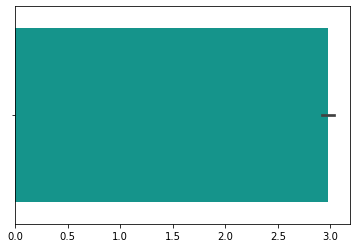

In [14]:
# Let's simulate a population of a 1000 throws with a weighted 
# tetrahedral die (with a 40% chance of throwing a 4)
# The result is a negatively skewed distribution
non_normal_data = np.random.choice(data, 1000, p=[0.10, .20, .30, .4])
p=sns.barplot(non_normal_data)

In [15]:
# Check out the mean of the non normal distribution
non_normal_data.mean()

2.98

D:\1\a3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\1\a3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\1\a3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, F

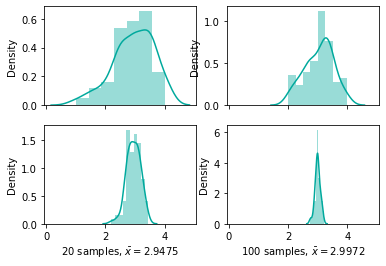

In [16]:
# In this example we plot four sampling distributions of different
# sizes to show the effect of the increasing sample size.
# Note thst the distribution is getting more normal and skinny
# with an increased sample size.
f, (ax1, ax2) = plt.subplots(2, 2, sharex=True)
axes = [ax1[0], ax1[1], ax2[0], ax2[1]]
ax = 0

for sample_size in [2,5,20,100]:
    sampling_distribution = []
    for i in range(100):
        mean_sample = np.random.choice(non_normal_data, sample_size).mean()
        sampling_distribution.append(mean_sample)

    p=sns.distplot(sampling_distribution, ax=axes[ax], 
                   axlabel=str(sample_size) + ' samples, $\\bar{x}=$' + 
                   str(np.mean(sampling_distribution)))
    ax += 1

### Done!

#### Next: _Confidence Interval_